In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [56]:
dest_area = pd.DataFrame()
start_area = pd.DataFrame()
i=0
k=0
for file in os.listdir(r'..\data\total_cluster_boundary_area'):
    if 'dest' in file:
        dest_area.loc[i,'OD']= 'dest'
        dest_area.loc[i,'Month'] = int(float(file.split('_')[2]))
        dest_area.loc[i,'Area'] = pd.read_excel(r'..\data\total_cluster_boundary_area\%s'%file).loc[0,'AREA']
        i=i+1

k=0
for file in os.listdir(r'..\data\total_cluster_boundary_area'):
    if 'starting' in file:
        start_area.loc[k,'OD']= 'starting'
        start_area.loc[k,'Month'] = int(float(file.split('_')[2]))
        start_area.loc[k,'Area'] = pd.read_excel(r'..\data\total_cluster_boundary_area\%s'%file).loc[0,'AREA']
        k=k+1
    

In [66]:
boundary_area = pd.concat([start_area,dest_area]).sort_values(by = 'Month')
boundary_area

,OD,Month,Area
1,starting,1,52.404301
1,dest,1,40.463600
2,starting,2,51.679401
2,dest,2,40.592602
3,starting,3,91.125702
3,dest,3,71.044899
4,starting,4,135.921997
4,dest,4,95.000999
5,starting,5,148.054993
5,dest,5,102.907997


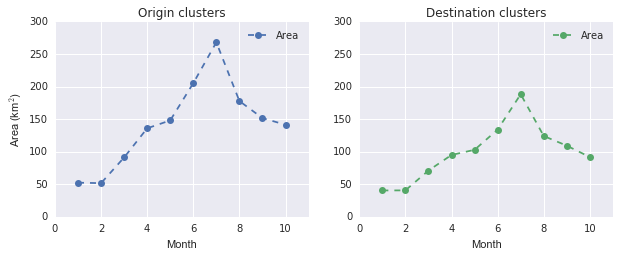

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (10,3.5))
boundary_area[boundary_area['OD']=='starting'].plot(x='Month',y='Area',style ='--o',ax = axes[0])
axes[0].set_ylabel('Area (km$^2$)')
axes[0].set_title('Origin clusters')
axes[0].set_ylim(0,300)
axes[0].set_xlim(0,11)
boundary_area[boundary_area['OD']=='dest'].plot(x='Month',y='Area',style='g--o',ax = axes[1])
axes[1].set_title('Destination clusters')
axes[1].set_xlim(0,11)
axes[1].set_ylim(0,300)
fig.savefig(r'../plots/spatial_coverage_of_clusters',dpi=300,bbox_inches='tight')